In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data/hwg.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
df.head()

,Gender,Height,Weight,genc
0,Male,73.847017,241.893563,True
1,Male,68.781904,162.310473,True
2,Male,74.110105,212.740856,True
3,Male,71.730978,220.042470,True
4,Male,69.881796,206.349801,True


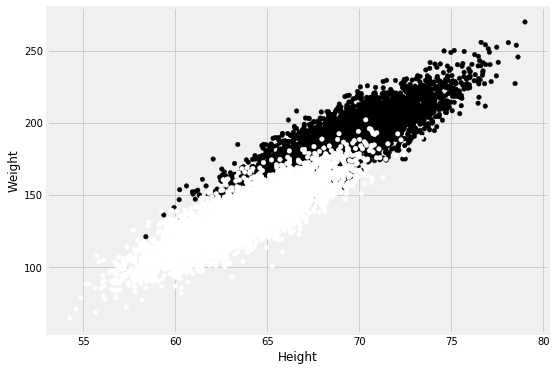

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
df['genc'] = df['Gender'] == 'Male'
df.plot.scatter('Height', 'Weight', c=df['genc'], ax=ax)

## Variances of single variables

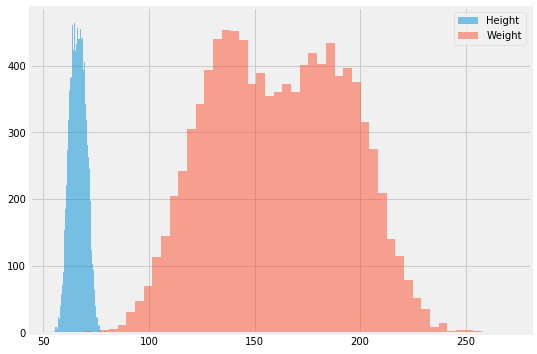

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
df['Height'].hist(bins=50, ax=ax, alpha=0.5, label='Height')
df['Weight'].hist(bins=50, ax=ax, alpha=0.5, label='Weight')
plt.legend()

### The Covariance Matrix

In [17]:
np.cov(df['Height'], df['Weight'])

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

## Example of Low Covariance - Rotate the Male data by 90deg

### The rotation matrix:
$$ R_{\theta} = \begin{bmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta\end{bmatrix}$$

In [32]:
def get_rotation_matrix(theta):  # in RADIANS!
    return np.array([[np.cos(theta), - np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

In [43]:
# Normalize the data, so we are rotating about the origin
X = df[['Height', 'Weight']].values
xCent = X - X.mean(axis=0)
xNorm = xCent / xCent.std(axis=0)

# put it back into the dataframe
df['hnorm'] = xNorm[:, 0]
df['wnorm'] = xNorm[:, 1]

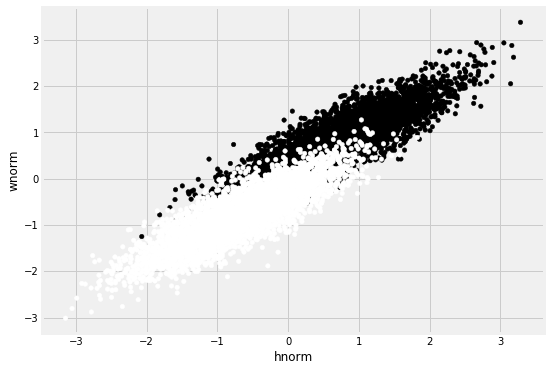

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

df.plot.scatter('hnorm', 'wnorm', c=df['genc'], ax=ax)

### Question: What's different about this scatterplot?

In [47]:
males = df[df['Gender'] == 'Male']
X = males[['hnorm', 'wnorm']].values
females = df[df['Gender'] == 'Female']
Y = females[['hnorm', 'wnorm']].values

In [48]:
rotator_90 = get_rotation_matrix(np.pi / 2)
xrot = np.dot(rotator_90, X.T)

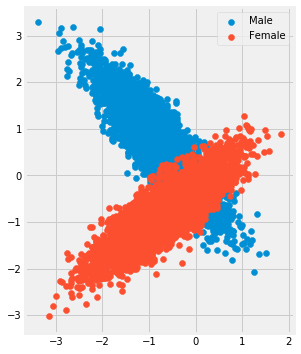

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(*xrot, label='Male')
plt.scatter(*Y.T, label='Female')
plt.gca().set_aspect('equal')
plt.legend()

In [52]:
newData = np.r_[xrot.T, Y]

In [54]:
np.cov(newData.T)

array([[ 0.43811275, -0.06076481],
       [-0.06076481,  1.00585732]])

In [ ]:
# Note the negative sign!